In [37]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from target_var_cleaning.FFR_cleaner import *
from txt_data_cleaning.data_cleaner import textCleaner
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import math

# Data Cleaning

In [2]:
os.listdir(os.getcwd()+"\\data\\data\\minutes")

['1993-02-03.txt',
 '1993-03-23.txt',
 '1993-05-18.txt',
 '1993-07-07.txt',
 '1993-08-17.txt',
 '1993-09-21.txt',
 '1993-11-16.txt',
 '1993-12-21.txt',
 '1994-02-04.txt',
 '1994-03-22.txt',
 '1994-05-17.txt',
 '1994-07-06.txt',
 '1994-08-16.txt',
 '1994-09-27.txt',
 '1994-11-15.txt',
 '1994-12-20.txt',
 '1995-02-01.txt',
 '1995-03-28.txt',
 '1995-05-23.txt',
 '1995-07-06.txt',
 '1995-08-22.txt',
 '1995-09-26.txt',
 '1995-11-15.txt',
 '1995-12-19.txt',
 '1996-01-31.txt',
 '1996-03-26.txt',
 '1996-05-21.txt',
 '1996-07-03.txt',
 '1996-08-20.txt',
 '1996-09-24.txt',
 '1996-11-13.txt',
 '1996-12-17.txt',
 '1997-02-05.txt',
 '1997-03-25.txt',
 '1997-05-20.txt',
 '1997-07-02.txt',
 '1997-08-19.txt',
 '1997-09-30.txt',
 '1997-11-12.txt',
 '1997-12-16.txt',
 '1998-02-04.txt',
 '1998-03-31.txt',
 '1998-05-19.txt',
 '1998-07-01.txt',
 '1998-08-18.txt',
 '1998-09-29.txt',
 '1998-11-17.txt',
 '1998-12-22.txt',
 '1999-02-03.txt',
 '1999-03-30.txt',
 '1999-05-18.txt',
 '1999-06-30.txt',
 '1999-08-24

In [3]:
path = os.getcwd()+"\\data\\data\\minutes"
minutes_folder = os.listdir(path)
datelst = [] #to input dates
cleaned_file_lst=[] #to imput text arrays
for files in minutes_folder:
    file_date = files.rsplit('.',1)[0]
    text_cleaner = textCleaner(file_date)
    read_file = text_cleaner.readfile(path+"\\"+files)
    cleaned_file = text_cleaner.cleaning(read_file)
    datelst.append(file_date) #append results into appropriate array for use
    cleaned_file_lst.append(cleaned_file)

In [4]:
print(datelst)

['1993-02-03', '1993-03-23', '1993-05-18', '1993-07-07', '1993-08-17', '1993-09-21', '1993-11-16', '1993-12-21', '1994-02-04', '1994-03-22', '1994-05-17', '1994-07-06', '1994-08-16', '1994-09-27', '1994-11-15', '1994-12-20', '1995-02-01', '1995-03-28', '1995-05-23', '1995-07-06', '1995-08-22', '1995-09-26', '1995-11-15', '1995-12-19', '1996-01-31', '1996-03-26', '1996-05-21', '1996-07-03', '1996-08-20', '1996-09-24', '1996-11-13', '1996-12-17', '1997-02-05', '1997-03-25', '1997-05-20', '1997-07-02', '1997-08-19', '1997-09-30', '1997-11-12', '1997-12-16', '1998-02-04', '1998-03-31', '1998-05-19', '1998-07-01', '1998-08-18', '1998-09-29', '1998-11-17', '1998-12-22', '1999-02-03', '1999-03-30', '1999-05-18', '1999-06-30', '1999-08-24', '1999-10-05', '1999-11-16', '1999-12-21', '2000-02-02', '2000-03-21', '2000-05-16', '2000-06-28', '2000-08-22', '2000-10-03', '2000-11-15', '2000-12-19', '2001-01-31', '2001-03-20', '2001-05-15', '2001-06-27', '2001-08-21', '2001-10-02', '2001-11-06', '2001

In [5]:
print(len(cleaned_file_lst))
print(len(datelst))
for i in range(len(cleaned_file_lst)):
    if cleaned_file_lst[i]==[]:
        print(datelst[i])

232
232
1993-02-03


In [6]:
def FFR_cleaner_execute():
    x=FFR_cleaner.readfile('data/data/FEDFUNDS.csv')
    y=MinutesDates.getMinutesDates('data/data/minutes')
    FFR_cleaned_list = FFR_cleaner.cleaner(x,y)
    print(FFR_cleaned_list)
    return FFR_cleaned_list

In [7]:
FFR_cleaned_list = FFR_cleaner_execute()

[-2.9315960912052073, 2.3489932885905986, -0.6557377049180334, 1.980198019801982, -2.750809061488672, -1.4975041597337746, 6.4189189189189175, 6.031746031746031, 13.32335329341318, 12.41743725231175, 5.0528789659224405, 5.816554809843416, 6.236786469344606, 8.457711442786065, 5.045871559633017, 4.454148471615735, 0.8361204013377748, -1.741293532338301, -3.1223628691983056, 1.04529616724738, -0.3448275862069045, -3.114186851211068, -0.714285714285715, -5.305755395683452, -0.6647673314339839, 2.0076481835563964, -2.1555763823805103, 1.5325670498084305, -0.4716981132075371, 0.28436018957345366, -1.3232514177693646, 3.2567049808428927, 2.1335807050092805, 0.6357856494096141, 1.6032101438630423e-14, 0.0, -0.5415162454873691, -0.1814882032667838, 0.636363636363639, -0.8130081300812995, -0.3642987249544549, 1.4625228519195461, 0.0, -0.7207207207207215, -10.163339382940102, -5.454545454545464, 0.3205128205128327, 2.449414270500518, -1.455301455301443, 0.42194092827003316, 5.672268907563035, 3.

In [8]:
print(len(FFR_cleaned_list))

232


In [9]:
cleaned_file_lst.pop(0)
datelst.pop(0)
FFR_cleaned_list.pop(0)

-2.9315960912052073

In [10]:
print(len(FFR_cleaned_list))
print(len(cleaned_file_lst))
print(len(datelst))

231
231
231


In [11]:
from sentiment_analysis.tensorflow_base import adamw_optimizer
from sentiment_analysis.tensorflow_bert import TFBertSentimentAnalysis
from sentiment_analysis.util.score import normalize_target
from sentiment_analysis.util.tensorflow_aggregators import tf_self_weighted_average
from sentiment_analysis.text_processing import cleaning, regex_patterns, tokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bsmat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bsmat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
statements_periods = pd.PeriodIndex(datelst, freq='M')
statements_periods

PeriodIndex(['1993-03', '1993-05', '1993-07', '1993-08', '1993-09', '1993-11',
             '1993-12', '1994-02', '1994-03', '1994-05',
             ...
             '2020-12', '2021-01', '2021-03', '2021-04', '2021-06', '2021-07',
             '2021-09', '2021-11', '2021-12', '2022-01'],
            dtype='period[M]', length=231, freq='M')

In [13]:
normalized_scores = normalize_target(FFR_cleaned_list, min_score=-1)
normalized_scores

array([ 0.06141275,  0.02882429,  0.0574129 ,  0.00610174,  0.01969473,
        0.10555401,  0.10135485,  0.18043756,  0.17061225,  0.09073833,
        0.09902094,  0.10357866,  0.12766618,  0.09066233,  0.08424467,
        0.04500456,  0.01705066,  0.00207197,  0.04727322,  0.03219633,
        0.00216064,  0.02818929, -0.02160849,  0.02872635,  0.05771062,
        0.01255746,  0.05255802,  0.03082033,  0.03902032,  0.02158462,
        0.07125754,  0.05907645,  0.04283178,  0.03593623,  0.03593623,
        0.0300631 ,  0.03396786,  0.04283805,  0.02711858,  0.03198515,
        0.05179834,  0.03593623,  0.0281195 , -0.07429247, -0.02322222,
        0.03941242,  0.06250189,  0.02015245,  0.04051249,  0.09745606,
        0.07474795,  0.07965218,  0.01192358,  0.09528072,  0.08638143,
        0.09062831,  0.10388743,  0.03427533,  0.03510451,  0.03510387,
        0.01761014, -0.03523879, -0.06925634, -0.14382149, -0.09286418,
       -0.03509365, -0.23593754, -0.23325603, -0.1041759 , -0.01

In [14]:
for i in range(len(cleaned_file_lst)):
    cleaned_file_lst[i]=" ".join(cleaned_file_lst[i])

In [15]:
print(cleaned_file_lst[0])

system open market account reported developments foreign exchange markets previous system open market transactions foreign currencies thus required deputy manager domestic operations reported developments domestic financial markets system open market transactions government securities federal agency obligations period unanimous committee ratified committee turned discussion economic outlook implementation monetary policy period summary economic financial information available time discussion provided followed domestic policy directive approved committee issued federal reserve bank new information reviewed economic activity expanding moderate pace increasing substantially fourth although outlays business equipment remained strong upward sales new homes slackened consumer spending rising less indicators production activity industrial output continued post solid homebuilding less robust payroll employment unemployment rate moved increases wages remained subdued advances consumer producer 

In [18]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3 )
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [19]:
train_index_list=[]
test_index_list=[]
for train_index, test_index in kf.split(normalized_scores):
    train_index_list.append(train_index)
    test_index_list.append(test_index)
    
print(train_index_list)
print(test_index_list)

[array([ 77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
       220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230]), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,

# Model training

In [20]:
bert_handle_name = "electra_small"

epochs = 20
batch_size = 4

In [21]:
num_train_steps = epochs * normalized_scores.shape[0]

In [22]:
minutes_bert = TFBertSentimentAnalysis(
    bert_handle_name,
    score_aggregator=tf_self_weighted_average
)

In [22]:
minutes_bert_train_loss_tracer = []
for i in range(len(train_index_list)):
    minutes_bert = TFBertSentimentAnalysis(
    bert_handle_name,
    score_aggregator=tf_self_weighted_average
    )
    minutes_bert.train(
        target_scores=normalized_scores[train_index_list[i][0]:train_index_list[i][-1]],
        text_sequence_dataset=cleaned_file_lst[train_index_list[i][0]:train_index_list[i][-1]],
        epochs=epochs,
        batch_size=batch_size,
        train_loss_tracer=minutes_bert_train_loss_tracer,
        optimizer=adamw_optimizer(
            num_train_steps=num_train_steps
        )
    )
    minutes_bert.save("xValidation_models/model"+str(i))

Epoch    2/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.18639601602290684


Epoch    3/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.05645865519554951


Epoch    4/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.045719449841178574


Epoch    5/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.0382821763602969


Epoch    6/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.03668692326531387


Epoch    7/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.059814385669783525


Epoch    8/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.034055715158898145


Epoch    9/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.03921841008540911


Epoch   10/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.036849031660658046


Epoch   11/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.029114876942446407


Epoch   12/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.022979996382043913


Epoch   13/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.021797477691553723


Epoch   14/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.025014995385367327


Epoch   15/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.020417720133152146


Epoch   16/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.01786080248749409


Epoch   17/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.010487453550852548


Epoch   18/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.00988471833541273


Epoch   19/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.0143124322091283


Epoch   20/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.014729574761496713


Epoch   20/   20: 100%|██████████| 39/39 [00:21<00:00,  1.84it/s]

 Loss:=0.008795777098827947


INFO:tensorflow:Assets written to: xValidation_models/model0\_bert_model\assets


INFO:tensorflow:Assets written to: xValidation_models/model0\_bert_model\assets
Epoch    2/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.16708390387417427


Epoch    3/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.03453457260259491


Epoch    4/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.03202300178938834


Epoch    5/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.028577396868936848


Epoch    6/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.027870401847959046


Epoch    7/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.02077368831318193


Epoch    8/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.029526251926215302


Epoch    9/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.026793740476744553


Epoch   10/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.015421814126778467


Epoch   11/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.012381825185127975


Epoch   12/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.008915391017016473


Epoch   13/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.006713474473960152


Epoch   14/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.006669047174188469


Epoch   15/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.007636697742249265


Epoch   16/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.007603916233447621


Epoch   17/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.00923550625608688


Epoch   18/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.003158329350393113


Epoch   19/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.0037807632350073807


Epoch   20/   20:   0%|          | 0/58 [00:00<?, ?it/s]

 Loss:=0.006940025512574658


Epoch   20/   20: 100%|██████████| 58/58 [00:32<00:00,  1.81it/s]

 Loss:=0.003555204331421229


INFO:tensorflow:Assets written to: xValidation_models/model1\_bert_model\assets


INFO:tensorflow:Assets written to: xValidation_models/model1\_bert_model\assets
Epoch    2/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.23119901278271124


Epoch    3/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.02866422777207425


Epoch    4/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.02741014433857531


Epoch    5/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.021169974677599013


Epoch    6/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.0183204290134689


Epoch    7/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.017189975092874076


Epoch    8/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.018926058870513376


Epoch    9/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.01051945179903832


Epoch   10/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.015310509079613555


Epoch   11/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.011227703904762912


Epoch   12/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.012124913906565128


Epoch   13/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.012346429820470989


Epoch   14/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.00879733022959091


Epoch   15/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.005642550395956884


Epoch   16/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.006104387730234661


Epoch   17/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.00421747625939763


Epoch   18/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.004097477495237492


Epoch   19/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.004974722566727836


Epoch   20/   20:   0%|          | 0/39 [00:00<?, ?it/s]

 Loss:=0.005101420411031144


Epoch   20/   20: 100%|██████████| 39/39 [01:00<00:00,  1.56s/it]

 Loss:=0.0037385266268990026


INFO:tensorflow:Assets written to: xValidation_models/model2\_bert_model\assets


INFO:tensorflow:Assets written to: xValidation_models/model2\_bert_model\assets


In [23]:
testmodel = TFBertSentimentAnalysis.restore('xValidation_models/model0')

In [24]:
test_score_batch=testmodel.score_batch(cleaned_file_lst[test_index_list[0][0]:test_index_list[0][-1]])

In [25]:
print(test_score_batch)

[ 0.0979812   0.08036403  0.07800017  0.06842356  0.1482874   0.04220336
  0.06190266  0.06028445  0.08968697  0.07100801  0.08402601  0.09696062
  0.05241587  0.09930755 -0.09598286  0.14208837 -0.0034626   0.08237992
  0.03467701  0.11745422  0.09471048  0.11928775  0.07486014 -0.0034626
  0.16016103  0.15805249  0.16072689  0.05243762  0.1371121   0.02803458
  0.134575    0.12360241  0.11135407  0.17402412  0.17254908  0.06655912
  0.07965519  0.09797763  0.02889298  0.09436546  0.13481091  0.16216706
  0.07673289  0.13460389  0.13232686  0.10196759  0.22848149  0.08573334
  0.01518055  0.05389758  0.09409813  0.15248589  0.10223688  0.13458179
  0.02120473  0.07990208  0.10753803  0.06205003  0.1937139   0.08175828
  0.17147349  0.10611396  0.12902294  0.21788943  0.05899163  0.03878014
  0.11185931  0.13715175  0.07526271  0.095342    0.06528999  0.11837058
  0.11344834  0.10013635  0.11650155  0.09160741]


In [30]:
print(test_score_batch.shape[0])

76


In [29]:
mean_squared_error(normalized_scores[test_index_list[0][0]:test_index_list[0][-1]],test_score_batch)

0.01363403790779305

# Model Evaluation (for pre-trained model)

In [44]:
rmse_list=[]
for i in range(len(train_index_list)):
    mod = TFBertSentimentAnalysis.restore('xValidation_models/model'+str(i))
    test_score_batch=mod.score_batch(cleaned_file_lst[test_index_list[i][0]:test_index_list[i][-1]])
    mse=mean_squared_error(normalized_scores[test_index_list[i][0]:test_index_list[i][-1]],test_score_batch)
    rmse_list.append(math.sqrt(mse))

print(rmse_list)

[0.11676488302479068, 0.06665857167058423, 0.2218004361951653]


In [78]:
rmse_average=sum(rmse_list)/(len(train_index_list))
print("THIS IS RSME AVERAGE SCORE FOR 3 FOLDS" + " " + str(rmse_average))

THIS IS RSME AVERAGE SCORE FOR 3 FOLDS 0.13507463029684674


In [49]:
mod= TFBertSentimentAnalysis.restore('xValidation_models/model0')
pred_output_train = mod.score_batch(cleaned_file_lst[train_index_list[0][0]:train_index_list[0][-1]])
Y=np.array(pred_output_train)
Y=Y.reshape(-1,1)
X=np.array(normalized_scores[train_index_list[0][0]:train_index_list[0][-1]])
X=X.reshape(-1,1)
reg = LinearRegression().fit(X,Y)
reg.score(X,Y)

0.8945293902069438

In [57]:
a=reg.coef_
b=reg.intercept_
print(a)
print(b)

[[0.92368586]]
[0.07732378]


/// for testing ///

plt.scatter(X,Y,color="blue")
plt.plot(X,a*X+b,color="black")
plt.title(str(1)+'/'+ str(len(train_index_list)) +' ' +'fold',fontsize=21)
print('R-Squared value:' +' '+ 'test')

[0.8945293902069438, 0.9064647465567173, 0.869954116394533]


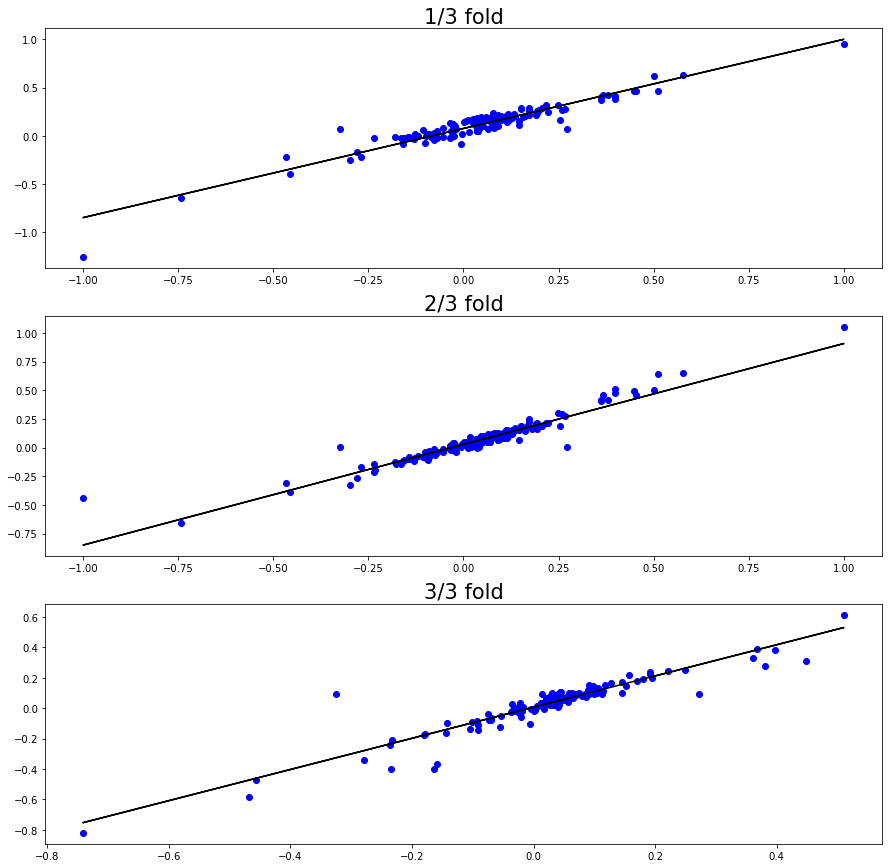

In [77]:
LR_score=[]
figure, axis = plt.subplots(3, 1,figsize=(15,15))
for i in range(len(train_index_list)):
    mod= TFBertSentimentAnalysis.restore('xValidation_models/model'+str(i))
    pred_output_train = mod.score_batch(cleaned_file_lst[train_index_list[i][0]:train_index_list[i][-1]])
    Y=np.array(pred_output_train)
    Y=Y.reshape(-1,1)
    X=np.array(normalized_scores[train_index_list[i][0]:train_index_list[i][-1]])
    X=X.reshape(-1,1)
    reg = LinearRegression().fit(X,Y)
    score=reg.score(X,Y)
    LR_score.append(score)
    a=reg.coef_
    b=reg.intercept_
    axis[i].scatter(X,Y,color="blue")
    axis[i].plot(X,a*X+b,color="black")
    axis[i].set_title(str(i+1)+'/'+ str(len(train_index_list)) +' ' +'fold',fontsize=21)

print(LR_score)

In [79]:
rsq_ave=sum(LR_score)/(len(train_index_list))
print("THIS IS R-SQUARED AVERAGE SCORE FOR 3 FOLDS" + " " + str(rsq_ave))

THIS IS R-SQUARED AVERAGE SCORE FOR 3 FOLDS 0.8903160843860647
